# Academic success

This notebook is to build a model that can predict if a student is going to graduate from school or not. 

This is part of a competition from Kaggle https://www.kaggle.com/competitions/playground-series-s4e6/overview

The dataset I'm using is from the same problem

1. Problem Definition

    <mark>We are trying to classificate if a student will graduate from school.

2. Dataset

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

3. Evaluation 

The evaluation metric is `accuracy`, I am trying to get a punctuation over .90.

You can check this on kaggle: www.kaggle.com/competitions/playground-series-s4e6/overview/evaluation

4. Features 

You can find a table with the explanation of all the features on the next link:  https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [1]:
# Import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# Import training data
data = pd.read_csv("data/train.csv")
df = pd.DataFrame(data)

In [3]:
# First look at our data
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
Marital status,1,1,1,1,1
Application mode,1,17,17,1,1
Application order,1,1,2,3,2
Course,9238,9238,9254,9500,9500
Daytime/evening attendance,1,1,1,1,1
Previous qualification,1,1,1,1,1
Previous qualification (grade),126.0,125.0,137.0,131.0,132.0
Nacionality,1,1,1,1,1
Mother's qualification,1,19,3,19,19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [5]:
# Check if the dataset has missing values
df.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [7]:
df["Mother\'s qualification"].value_counts()

Mother's qualification
1     20202
19    18980
37    18664
38     9059
3      5890
34     1993
2       613
12      358
4       313
5        99
40       49
39       46
9        45
11       32
41       26
6        21
42       19
43       16
10       15
36       15
29       15
35       10
30       10
22        5
14        5
26        4
18        3
44        2
33        2
31        2
15        1
7         1
8         1
28        1
27        1
Name: count, dtype: int64

In [6]:
def preprocess_data(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes
            
    return df

In [8]:
df_tmp = preprocess_data(df)
df_tmp

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,0


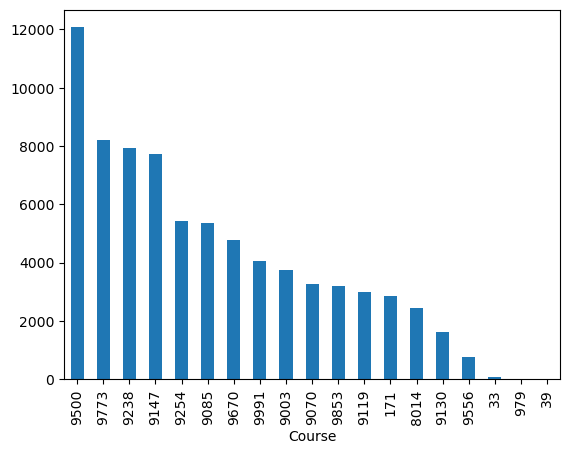

In [9]:
df_tmp["Course"].value_counts().plot(kind="bar");

In [10]:
df_tmp.Course.value_counts()

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

In [11]:
df_tmp.head().T

,0,1,2,3,4
id,0.000000,1.00,2.00,3.00000,4.000000
Marital status,1.000000,1.00,1.00,1.00000,1.000000
Application mode,1.000000,17.00,17.00,1.00000,1.000000
Application order,1.000000,1.00,2.00,3.00000,2.000000
Course,9238.000000,9238.00,9254.00,9500.00000,9500.000000
Daytime/evening attendance,1.000000,1.00,1.00,1.00000,1.000000
Previous qualification,1.000000,1.00,1.00,1.00000,1.000000
Previous qualification (grade),126.000000,125.00,137.00,131.00000,132.000000
Nacionality,1.000000,1.00,1.00,1.00000,1.000000
Mother's qualification,1.000000,19.00,3.00,19.00000,19.000000


In [12]:
df_tmp.shape

(76518, 38)

In [13]:
# Importing some tools to split and evaluate the dataset
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, GridSearchCV

# Importing the model I am going to use
from sklearn.ensemble import RandomForestClassifier

We are going to split our data, so we can perform some test before submitting the model to Kaggle

In [14]:
# Make X & y 
X = df_tmp.drop("Target", axis=1)
y = df_tmp["Target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [15]:
X_train.shape, X_test.shape

((61214, 37), (15304, 37))

In [16]:
# Creating our first model
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
clf.score(X_test, y_test)

0.8249477260846837

In [69]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8176294858572855

## Improving Hyperparameters

I am going to use RandomizedSearchCV to try different parameters for the model.

In [20]:
param_grid = {"n_estimators": np.arange(10, 100, 10),
              "max_depth": [None, 3, 5, 10, 20],
              "min_samples_split": np.arange(2, 20, 2),
              "max_features": [0.5, 1, "sqrt"]}

In [21]:
%%time
rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=param_grid,
                              n_iter=100,
                              n_jobs=-1,
                              cv=5,
                              verbose=True)

rs_model.fit(df_tmp.drop("Target", axis=1), df_tmp["Target"])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 14.6 s
Wall time: 12min 58s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [22]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'max_features': 'sqrt',
 'max_depth': 20}

In [74]:
rs_model.score(X_test, y_test)

0.8882645060115003

In [24]:
# Importing the test dataset
test_data = pd.read_csv("data/test.csv")
test = pd.DataFrame(test_data)
test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [25]:
# Trying some predictions
preds = rs_model.predict(test)
preds

array([0, 2, 2, ..., 0, 0, 0], dtype=int8)

I saw that `id` was a feature instead of an index, so I changed that in the next cell

In [ ]:
df.set_index("id", inplace=True)
test.set_index("id", inplace=True)

In [26]:
# Instantiate a model with the parameters I got from RandomSearchCV
ideal_model = RandomForestClassifier(n_estimators=70,
                                     min_samples_split=16,
                                     max_features = 'sqrt',
                                     max_depth=20)

In [65]:
# Create a function that returns a dataframe in the format Kaggle ask

def preparing_csv(preds):
    submission = pd.DataFrame()
    submission["id"] = test.index
    submission["target"] = preds
    submission.set_index("id", inplace=True)
    
    targets = submission.target.to_list()
    target_str = []
    for x in targets:
        target_str.append(str(x))

    target_str = list(map(lambda x: x.replace("0", "Dropout"), target_str))
    target_str = list(map(lambda x: x.replace("1", "Enrolled"), target_str))
    target_str = list(map(lambda x: x.replace("2", "Graduate"), target_str))
    
    submission.target = target_str
    
    return submission

In [32]:
# Fit the model to the full dataset
ideal_model.fit(df.drop("Target", axis=1), df["Target"])

RandomForestClassifier(max_depth=20, min_samples_split=16, n_estimators=70)

In [77]:
preds = ideal_model.predict(test)

In [78]:
submission = preparing_csv(preds)

In [79]:
submission.to_csv("academic_success_submissions/rs_submission.csv")

This submission had a score of `0.82758`

After fitting and submitting the model, I'm going to check the feature importances, and try some changes to the dataset to improve the score of the model.

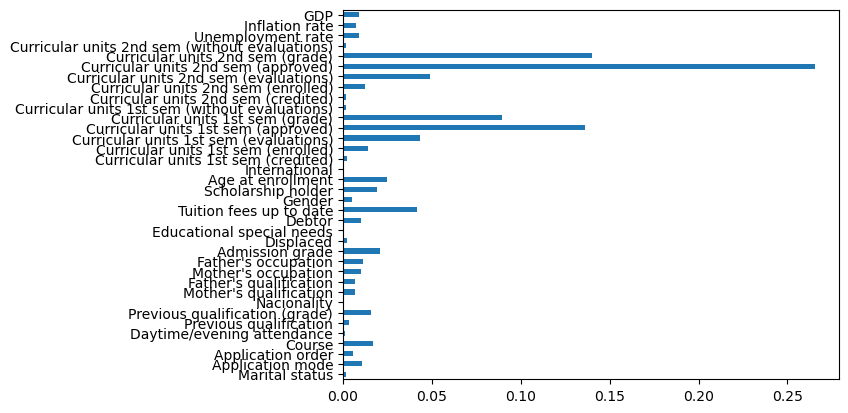

In [80]:
importances = ideal_model.feature_importances_
forest_importances = pd.Series(importances, df.drop("Target", axis=1).columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax);

I decided to drop the columns that had an importance lower than 0.01

In [47]:
delete_columns = {}
for i in range(0, len(test.columns)):
    if importances[i] <= 0.01:
        delete_columns[f"{test.columns[i]}"] = importances[i]

delete_columns

{'Marital status': 0.0016776308751897113,
 'Application order': 0.005587250419833423,
 'Daytime/evening attendance': 0.001197432510505947,
 'Previous qualification': 0.0026446957158521075,
 'Nacionality': 0.0006105022676828802,
 "Mother's qualification": 0.007124565691165781,
 "Father's qualification": 0.0068151151724074426,
 "Mother's occupation": 0.009899369440685658,
 'Displaced': 0.0024041885576385246,
 'Educational special needs': 0.0006035522242912173,
 'International': 0.00043696915948336873,
 'Curricular units 1st sem (credited)': 0.002072601111406802,
 'Curricular units 1st sem (without evaluations)': 0.0016701828283608143,
 'Curricular units 2nd sem (credited)': 0.0018674484890921625,
 'Curricular units 2nd sem (without evaluations)': 0.001927956808031808,
 'Unemployment rate': 0.008724376852042158,
 'Inflation rate': 0.007001604381403785,
 'GDP': 0.008432796395488029}

In [72]:
df_better = df_tmp.drop(columns = delete_columns, axis=1)
df_better

,Application mode,Course,Previous qualification (grade),Father's occupation,Admission grade,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
id,,,,,,,,,,,,,,,,,,,
0,1,9238,126.0,5,122.6,0,1,0,1,18,6,6,6,14.500000,6,7,6,12.428571,2
1,17,9238,125.0,9,119.8,0,1,0,0,18,6,8,4,11.600000,6,9,0,0.000000,0
2,17,9254,137.0,3,144.7,0,1,1,0,18,6,0,0,0.000000,6,0,0,0.000000,0
3,1,9500,131.0,2,126.1,0,1,0,1,18,7,9,7,12.591250,8,11,7,12.820000,1
4,1,9500,132.0,9,120.1,0,1,0,0,18,7,12,6,12.933333,7,12,6,12.933333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,17,9254,121.0,5,116.5,0,1,0,1,18,6,9,6,10.666667,6,8,5,10.600000,2
76514,1,9254,125.0,9,131.6,0,1,0,0,19,6,22,4,13.000000,6,9,6,13.875000,2
76515,17,9085,138.0,10,123.3,0,1,0,0,19,5,13,4,12.500000,5,8,5,11.400000,1


In [50]:
# Make X & y with the new dataset
X = df_better.drop("Target", axis=1)
y = df_better["Target"]

# Split the data in a train set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [51]:
ideal_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=16, n_estimators=70)

In [52]:
ideal_model.score(X_val, y_val)

0.8246863565081024

#### Checking importances again

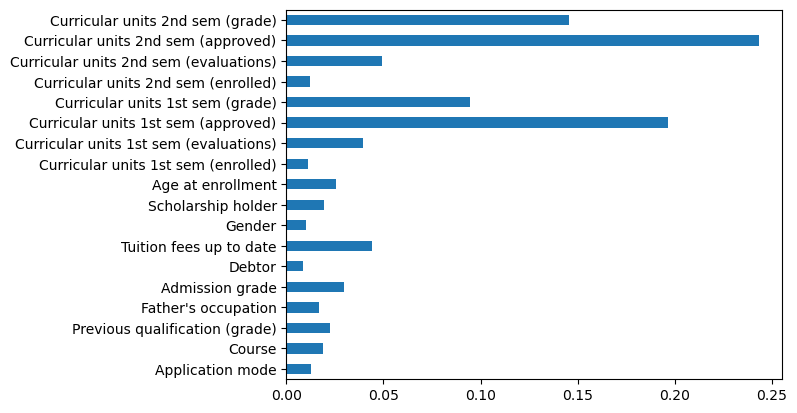

In [73]:
importances = ideal_model.feature_importances_
forest_importances = pd.Series(importances, df_better.drop("Target", axis=1).columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax);

After some experimenting I deleted some columns of the dataset.

Now with this new dataset I'm going to fit the ideal model and make the submission.

In [54]:
ideal_model.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_split=16, n_estimators=70)

In [55]:
preds = ideal_model.predict(test.drop(columns=delete_columns, axis=1))

In [66]:
submission = preparing_csv(preds)

In [67]:
submission

,target
id,
76518,Dropout
76519,Graduate
76520,Graduate
76521,Graduate
76522,Enrolled
...,...
127525,Dropout
127526,Dropout
127527,Dropout


In [ ]:
submission.to_csv("academic_success_submissions/submission.csv")

This last model, with some modifications, had a score of `0.82807`, improving the score of the first submission.

In [84]:
# Exporting the model
import pickle
pickle.dump(ideal_model, open("models/clf_rs.pkl", "wb"))

## What to try next?

Now I've done some changes to the dataset I see this can help getting better results, I think I can try making the Course column a categorical feature, because the model is taking it as an integer, and maybe there are some other features I can try to improve.